# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Az Zamalik, Giza, Egypt**, or **Egypt** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Az Zamalik, Giza, Egypt** to Ann Arbor, USA. In that case at least one source file must be about **Az Zamalik, Giza, Egypt**.

    - You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Az Zamalik, Giza, Egypt** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# important orientation.
**Union Territories in India**
- India has a total of 8 Union Territories and 28 states. The 8 Union territories in India include Delhi, Jammu & Kashmir, Ladakh, Dadra and Nagar Haveli and Daman and Diu, Puducherry, Chandigarh, Andaman and Nicobar Islands and Lakshadweep. Union Territory is a special administrative sector in the Republic of India. Unlike the states of India which have their own state governments, they do not have a government of their own and are controlled by central government (union government). Out of the nine union territories of India, Delhi, Puducherry (formerly Pondicherry) and J & K have their own legislatures. Each union territory has a capital of its own or the main area of administration.
___
source: https://www.holidify.com/collections/union-territories-of-india

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

plt.style.use('seaborn-colorblind')

In [197]:
df =  pd.read_csv('data/Unemployment_Rate_M_Urban.txt', sep = ',', skiprows = 1)
df

,Region,Date,Frequency,Value
0,Andhra Pradesh,2016-01-31,M,20.17
1,Andhra Pradesh,2016-02-29,M,9.73
2,Andhra Pradesh,2016-03-31,M,15.63
3,Andhra Pradesh,2016-04-30,M,9.68
4,Andhra Pradesh,2016-05-31,M,7.34
...,...,...,...,...
460,India,2017-02-28,M,6.47
461,India,2017-03-31,M,5.86
462,India,2017-04-30,M,4.25
463,India,2017-05-31,M,4.77


In [198]:
# Data Cleaning
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Region,Date,Frequency,Value
0,Andhra Pradesh,2016-01-31,M,20.17
1,Andhra Pradesh,2016-02-29,M,9.73
2,Andhra Pradesh,2016-03-31,M,15.63
3,Andhra Pradesh,2016-04-30,M,9.68
4,Andhra Pradesh,2016-05-31,M,7.34


- Dictionary in Python is an unordered collection of data values, used to store data values like a map, which unlike other Data Types that hold only single value as an element, Dictionary holds key : value pair.
- In Python Dictionary, items() method is used to return the list with all dictionary keys with values.

In [199]:
# Classifying as categories
df['is_UT'] = 'States';
# Classifying India Urban
df.loc[(df['Region'] == 'India'), 'is_UT'] = 'India Urban'
# then,uts
UT = ['Delhi', 'Chandigarh', 'Puducherry']
for key , value in df['Region'].items():
    if value in UT:
        df['is_UT'][key] = 'UTs'

<ipython-input-199-80c915174e80>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_UT'][key] = 'UTs'


In [200]:
df

,Region,Date,Frequency,Value,is_UT
0,Andhra Pradesh,2016-01-31,M,20.17,States
1,Andhra Pradesh,2016-02-29,M,9.73,States
2,Andhra Pradesh,2016-03-31,M,15.63,States
3,Andhra Pradesh,2016-04-30,M,9.68,States
4,Andhra Pradesh,2016-05-31,M,7.34,States
...,...,...,...,...,...
460,India,2017-02-28,M,6.47,India Urban
461,India,2017-03-31,M,5.86,India Urban
462,India,2017-04-30,M,4.25,India Urban
463,India,2017-05-31,M,4.77,India Urban


In [201]:
df.is_UT.unique()

array(['States', 'UTs', 'India Urban'], dtype=object)

In [202]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Region,Date,Frequency,Value,is_UT,Month,Year
0,Andhra Pradesh,2016-01-31,M,20.17,States,1,2016
1,Andhra Pradesh,2016-02-29,M,9.73,States,2,2016
2,Andhra Pradesh,2016-03-31,M,15.63,States,3,2016
3,Andhra Pradesh,2016-04-30,M,9.68,States,4,2016
4,Andhra Pradesh,2016-05-31,M,7.34,States,5,2016


In [203]:
grouped = df.groupby(['is_UT','Year','Month']).mean()
#grouped = grouped.reset_index()
grouped.head(30)

Value
is_UT       Year Month           
India Urban 2016 1      10.520000
                 2      10.560000
                 3      11.650000
                 4      11.330000
                 5      12.070000
                 6      10.350000
                 7      11.160000
                 8      11.200000
                 9       9.730000
                 10      7.620000
                 11      7.750000
                 12      7.740000
            2017 1       7.730000
                 2       6.470000
                 3       5.860000
                 4       4.250000
                 5       4.770000
                 6       4.470000
States      2016 1      10.450909
                 2      10.387273
                 3      10.634545
                 4      11.129545
                 5      11.410455
                 6      10.957727
                 7      10.492727
                 8      10.633636
                 9       9.356364
                 10      8.264091
                 11      7.590909
                 12      7.672273

In [204]:
grouped = grouped.reset_index()
import calendar
grouped['Month'] = grouped['Month'].apply(lambda x: calendar.month_abbr[x])
grouped.head()

,is_UT,Year,Month,Value
0,India Urban,2016,Jan,10.52
1,India Urban,2016,Feb,10.56
2,India Urban,2016,Mar,11.65
3,India Urban,2016,Apr,11.33
4,India Urban,2016,May,12.07


In [205]:
x_labels = grouped['Month'].astype(str) + grouped['Year'].astype(str).map(lambda x: x[2:])
x_labels.head()

0    Jan16
1    Feb16
2    Mar16
3    Apr16
4    May16
dtype: object

<IPython.core.display.Javascript object>


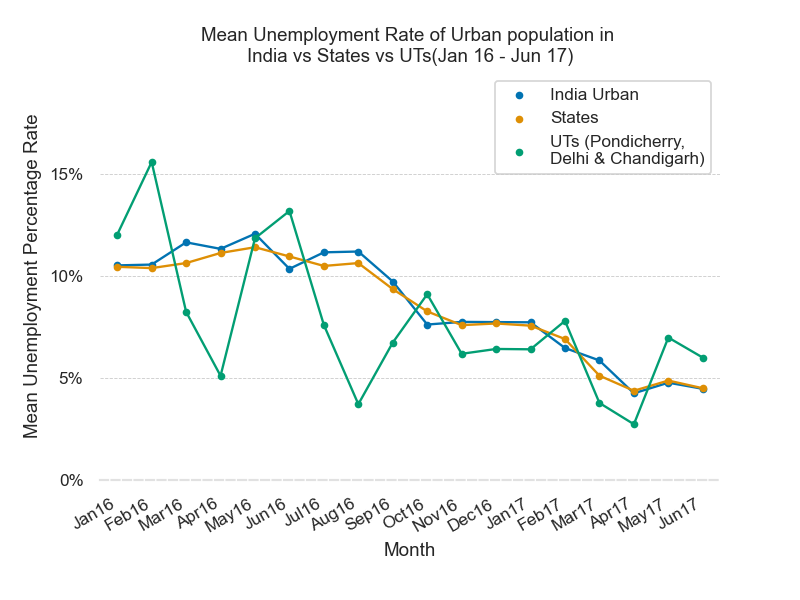

In [222]:
import seaborn as sns
fig = plt.figure()
sns.pointplot(x=x_labels , y='Value' ,data= grouped, hue = 'is_UT',
              palette = 'colorblind',scale = 0.5)

# Aesthetics
sns.despine(left = True)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Percentage Rate')
plt.title('Mean Unemployment Rate of Urban population in \nIndia vs States vs UTs(Jan 16 - Jun 17)')

plt.gca().spines['bottom'].set_color('#e1e1e1')
plt.gca().spines['bottom'].set_linestyle('--')

# handle the x_label interfernce.
fig.autofmt_xdate()

# handle y_axis numbers range and background lines.
plt.gca().set_ylim(0,20)
plt.gca().set_yticks(range(0,20,5))
plt.gca().yaxis.grid(which = 'major',
                      linestyle = '--', linewidth = 0.5)
# handle the legend
leg = plt.legend(frameon=False)
leg.get_frame().set_alpha(0)
# when i tried to edit the `UTs` the frame came back, i don't know why?.
plt.legend().get_texts()[2].set_text('UTs (Pondicherry, \nDelhi & Chandigarh)')

# adding the `%` sign beside the y_ticks.
y_labls=plt.gca().get_yticks().astype(int).astype(str)
y_labls = [str(x)+'%' for x in y_labls]
plt.gca().set_yticklabels(y_labls);

# Code Inspection.

In [207]:
y_labls=plt.gca().get_yticks()
y_labls

array([ 0,  5, 10, 15])

In [208]:
plt.legend().get_texts()[2],plt.legend().get_texts()[1]

(Text(0, 0, 'UTs'), Text(0, 0, 'States'))